In [16]:
import os
import random
import json
import pickle
import tensorflow as tf
import kagglehub as kh
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageDraw
import cv2
import random


In [3]:
tf.random.set_seed(42) # Set Random Seed

In [4]:
path = kh.dataset_download("msafi04/iss-docking-dataset") # Path for images

In [5]:
df = pd.read_csv(os.path.join(path, 'train.csv')) # Import CSV (Coordinates and distances)

In [6]:
image_paths = []
for f in os.listdir(os.path.join(path, 'train')):
    if f.startswith('.') or '.jpg' not in f:
        continue
    image_paths.append(os.path.join(path, 'train', f))
len(image_paths)
image_paths.sort(key=lambda x: int(''.join(filter(str.isdigit, x))))
print(image_paths[:5])

['/Users/jacobbalek/.cache/kagglehub/datasets/msafi04/iss-docking-dataset/versions/1/train/0.jpg', '/Users/jacobbalek/.cache/kagglehub/datasets/msafi04/iss-docking-dataset/versions/1/train/1.jpg', '/Users/jacobbalek/.cache/kagglehub/datasets/msafi04/iss-docking-dataset/versions/1/train/2.jpg', '/Users/jacobbalek/.cache/kagglehub/datasets/msafi04/iss-docking-dataset/versions/1/train/3.jpg', '/Users/jacobbalek/.cache/kagglehub/datasets/msafi04/iss-docking-dataset/versions/1/train/4.jpg']


In [7]:
# Helper function to plot images
def plot_image(img):
    img = io.imread(img)
    fig = px.imshow(img)
    fig.show()

# Plot test images
# for i in range(3):
#     plot_image(image_paths[i])
    

In [8]:
def as_image(image_path): # Turns image into numpy array
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=3)
    image = tf.cast(image, tf.float32) / 255.0
    return image

# as_image(image_paths[0])

In [9]:
data_gen_args = dict(featurewise_center=True,
                     featurewise_std_normalization=True,
                     rotation_range=90,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     zoom_range=0.2)
image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**data_gen_args)

def transform_image(img,tx=0,ty=0,zoom=1.0,rotation=0.0,shear=0.0):
    transform_parameters = {}
    orig_image = np.array(img, copy=True).reshape(512,512,3)
    transform_parameters['theta'] = rotation
    transform_parameters['zx'] = zoom
    transform_parameters['zy'] = zoom
    transform_parameters['tx'] = tx
    transform_parameters['ty'] = ty
    transform_parameters['shear'] = shear
    orig_image = image_datagen.apply_transform(x=orig_image, transform_parameters=transform_parameters)
    return orig_image

Rah

In [10]:
# Turn image into numpy array
from PIL import Image
import numpy as np

# Load the image
image = Image.open(image_paths[0])

# Convert the image to a NumPy array
numpy_array = np.asarray(image)

# Print the type and shape of the array
print(type(numpy_array))
print(numpy_array.shape)

<class 'numpy.ndarray'>
(512, 512, 3)


In [11]:
from PIL import Image

# Open the image
image = Image.open(image_paths[0])

# Rotate the image by a specified angle (in degrees)
rotated_image = image.rotate(angle=80) # Rotates by 45 degrees counter-clockwise

# Save the rotated image
rotated_image.save("rotated_image.jpg")

# Display the rotated image (optional)
rotated_image.show()

In [12]:
locations = df.get('location').tolist()

distances[:5]

# Create new df df_rotated

NameError: name 'distances' is not defined

In [13]:
# Rotate pixel location using the rotation matrix
def rotate_pixel_location(pixel_x, pixel_y, rotation_angle):
    """
    Rotate a pixel's location around the center of the image by the given rotation angle.
    
    Args:
    - pixel_x, pixel_y: The coordinates of the pixel to rotate.
    - image_shape: The shape of the image (height, width, channels).
    - rotation_angle: The angle (in degrees) by which to rotate the pixel.

    Returns:
    - (new_x, new_y): The new coordinates of the rotated pixel.
    """
    # Get image dimensions
    (h, w) = [512, 512]

    # Compute center of image
    center = (w // 2, h // 2)

    # Convert pixel coordinates to a 2x1 vector
    pixel_coords = np.array([pixel_x - 256, pixel_y - 256]) # And change pixels from bottom left to rotate around the center

    # Create the rotation matrix
    M = cv2.getRotationMatrix2D(center, rotation_angle, 1.0)
    
    # Apply the rotation matrix to the pixel coordinates
    new_coords = np.dot(M[:, :2], pixel_coords) + M[:, 2]

    new_x, new_y = new_coords
    return int(new_x + 256), int(new_y + 256)

In [14]:
# Read CSV
df_ISS = pd.read_csv(os.path.join(path, 'train.csv'))

In [17]:
# for i in range(1000): # Rotate the images
rotated_locations = [] # Define list to store rotated pixel locations

# Rotate the images
for i in range(10):
    
    # Open the image
    image = Image.open(image_paths[i])
    print(image_paths[0])

    # Extract pixel
    location = df_ISS["location"][i]
    print(location)

    # print(location)
    location = tuple(json.loads(location))

    pixel_x = location[0]
    pixel_y = location[1]

    '''
    # Create an ImageDraw object
    draw = ImageDraw.Draw(image)
    draw.point((pixel_x, pixel_y), fill = (255, 0, 0))
    # draw.point((, 354), fill = (255, 0, 0))
    image.show()
    '''
    
    #~~~~~~~~~~~

    # Find random angle
    random_angle = np.random.uniform(0, 360)

    # Rotate the image by a random angle specified angle (in degrees)
    rotated_image = image.rotate(angle=random_angle) # Rotates by random angle (in degrees) counter-clockwise

    # Save the rotated image
    image_path = "Rotated_ISS_imgs" # Path to save
    image.save(f"{image_path}/rotated_{i}.png")

    # Extract pixel
    location = df_ISS["location"][i]
    # print(location)
    location = tuple(json.loads(location))

    '''
    # print(location)
     #print(type(location))
    pixel_x = location[0]
    pixel_y = location[1]
    '''

    # Rotate the point

    rotated_location = rotate_pixel_location(pixel_x, pixel_y, 360 - random_angle)
    rotated_location = np.array(rotated_location)

    rotated_locations.append(rotated_location)

    rotated_pixel_x = rotated_location[0]
    rotated_pixel_y = rotated_location[1]
    

    if i < 5:

        # Draw og
        draw = ImageDraw.Draw(image)
        draw.point((pixel_x, pixel_y), fill = (255, 0, 0))
        image.show()

        # Display the rotated image with pixel
        rotated_pixel_x = rotated_location[0]
        rotated_pixel_y = rotated_location[1]
        print(rotated_location)
        # rotated_image.show()

        # Create an ImageDraw object
        rotated_draw = ImageDraw.Draw(rotated_image)
        rotated_draw.point((rotated_pixel_x, rotated_pixel_y), fill = (255, 0, 0))
        rotated_image.show()
   

/Users/jacobbalek/.cache/kagglehub/datasets/msafi04/iss-docking-dataset/versions/1/train/0.jpg
[215, 158]
[422  58]
/Users/jacobbalek/.cache/kagglehub/datasets/msafi04/iss-docking-dataset/versions/1/train/0.jpg
[228, 269]
[175 674]
/Users/jacobbalek/.cache/kagglehub/datasets/msafi04/iss-docking-dataset/versions/1/train/0.jpg
[255, 386]
[734 331]
/Users/jacobbalek/.cache/kagglehub/datasets/msafi04/iss-docking-dataset/versions/1/train/0.jpg
[306, 426]
[302 433]
/Users/jacobbalek/.cache/kagglehub/datasets/msafi04/iss-docking-dataset/versions/1/train/0.jpg
[248, 338]
[249 335]
/Users/jacobbalek/.cache/kagglehub/datasets/msafi04/iss-docking-dataset/versions/1/train/0.jpg
[259, 436]
/Users/jacobbalek/.cache/kagglehub/datasets/msafi04/iss-docking-dataset/versions/1/train/0.jpg
[223, 343]
/Users/jacobbalek/.cache/kagglehub/datasets/msafi04/iss-docking-dataset/versions/1/train/0.jpg
[300, 159]
/Users/jacobbalek/.cache/kagglehub/datasets/msafi04/iss-docking-dataset/versions/1/train/0.jpg
[286, 4

Stuff


In [18]:
from PIL import Image, ImageDraw
import numpy as np
import json
import cv2
import pandas as pd
import os

# Function to rotate a pixel location using the rotation matrix
def rotate_pixel_location(pixel_x, pixel_y, rotation_angle, center=(256, 256)):
    """
    Rotate a pixel's location around the center of the image by the given rotation angle.
    
    Args:
    - pixel_x, pixel_y: The coordinates of the pixel to rotate.
    - rotation_angle: The angle (in degrees) by which to rotate the pixel.
    - center: The center of rotation (default is the center of a 512x512 image).
    
    Returns:
    - (new_x, new_y): The new coordinates of the rotated pixel.
    """
    # Convert angle to radians
    angle_rad = np.deg2rad(rotation_angle)
    
    # Create the rotation matrix
    cos_angle = np.cos(angle_rad)
    sin_angle = np.sin(angle_rad)
    
    # Translate pixel to origin, rotate, and then translate back
    new_x = cos_angle * (pixel_x - center[0]) - sin_angle * (pixel_y - center[1]) + center[0]
    new_y = sin_angle * (pixel_x - center[0]) + cos_angle * (pixel_y - center[1]) + center[1]
    
    return int(new_x), int(new_y)

# Read CSV
df_ISS = pd.read_csv(os.path.join(path, 'train.csv'))

# Loop through images (just processing one for now)
for i in range(1):
    
    # Open the image
    image = Image.open(image_paths[i])
    print(f"Processing: {image_paths[i]}")

    # Extract pixel location from DataFrame
    location = df_ISS["location"][i]
    print(f"Location before rotation: {location}")

    # Parse location as tuple
    location = tuple(json.loads(location))

    pixel_x = location[0]
    pixel_y = location[1]

    # Find a random angle for rotation
    random_angle = np.random.uniform(0, 360)

    # Rotate the image by a random angle
    rotated_image = image.rotate(angle=random_angle)  # Rotates by random angle (counter-clockwise)

    # Save the rotated image
    image_path = "Rotated_ISS_imgs"
    rotated_image.save(f"{image_path}/rotated_{i}.png")

    # Rotate the pixel location
    rotated_pixel_location = rotate_pixel_location(pixel_x, pixel_y, random_angle)

    print(f"Rotated pixel location: {rotated_pixel_location}")

    # Draw the original pixel on the rotated image
    rotated_draw = ImageDraw.Draw(rotated_image)
    rotated_pixel_x, rotated_pixel_y = rotated_pixel_location
    rotated_draw.point((rotated_pixel_x, rotated_pixel_y), fill=(255, 0, 0))

    # Display the rotated image with the rotated pixel
    rotated_image.show()


Processing: /Users/jacobbalek/.cache/kagglehub/datasets/msafi04/iss-docking-dataset/versions/1/train/0.jpg
Location before rotation: [215, 158]
Rotated pixel location: (331, 181)


In [10]:
# Rotate by 45 degrees

# Load the image
image = Image.open(image_paths[0])

# Convert the image to a NumPy array
numpy_array = np.asarray(image)

print(len(numpy_array))

# Print the type and shape of the array
print(type(numpy_array))
print("Shape", numpy_array.shape)
img = numpy_array

# img = img.astype(np.float32)


image = numpy_array.reshape(512,512,3)
print(numpy_array.shape)

#~~~~

from scipy.ndimage import rotate
import numpy as np
import matplotlib.pyplot as plt

'''

# Apply rotation using scipy
rotated_image = rotate(img, 45, reshape=True)

# Plot the original and rotated image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.title("Rotated Image")
plt.imshow(rotated_image)
plt.show()
'''

"""

#~~~~~~~
# Initialize the generator with transformations
datagen = ImageDataGenerator(rotation_range=45)

# Assuming img is a 3D numpy array with shape (height, width, 3)
transformed_image = datagen.random_transform(img)

# Plot the images
plot_image(image)
plot_image(transformed_image)

"""

''''

trans_image = transform_image(img,tx=0,ty=0,zoom=1.0,rotation=180.0,shear=0.0)
plot_image(image)
plot_image(trans_image)
'''

512
<class 'numpy.ndarray'>
Shape (512, 512, 3)
(512, 512, 3)


"'\n\ntrans_image = transform_image(img,tx=0,ty=0,zoom=1.0,rotation=180.0,shear=0.0)\nplot_image(image)\nplot_image(trans_image)\n"

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from keras.src.legacy.preprocessing.image import ImageDataGenerator

# Initialize ImageDataGenerator
data_gen_args = dict(rotation_range=90,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     zoom_range=0.2)

image_datagen = ImageDataGenerator(**data_gen_args)

# Function to transform image
def transform_image(img, tx=0, ty=0, zoom=1.0, rotation=0.0, shear=0.0):
    orig_image = np.array(img, copy=True)  # Ensure it's a NumPy array
    orig_image = orig_image / 255.0  # Normalize image

    transform_parameters = {
        'theta': rotation,
        'zx': zoom,
        'zy': zoom,
        'tx': tx,
        'ty': ty,
        'shear': shear
    }

    transformed_img = image_datagen.apply_transform(x=orig_image, transform_parameters=transform_parameters)
    return transformed_img

# Function to display image
def plot_transformed_image(img_array):
    plt.imshow(np.clip(img_array, 0, 1))
    plt.axis('off')
    plt.show()


In [ ]:
import os
import numpy as np
import tensorflow as tf
# from tf.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.utils import load_img, img_to_array


import matplotlib.pyplot as plt

# Function to load images from a directory
def load_images_from_directory(directory_path, img_size=(256, 256)):
    image_paths = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith('.jpg') or f.endswith('.png')]
    images = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=img_size)
        img = img_to_array(img)
        images.append(img)
    return np.array(images)

# Function to rotate images randomly using ImageDataGenerator
def rotate_images_randomly(images, rotation_range=180, batch_size=1):
    # Initialize ImageDataGenerator with random rotation
    datagen = ImageDataGenerator(rotation_range=rotation_range)
    
    # Apply transformations
    it = datagen.flow(images, batch_size=batch_size)
    
    return it

# Function to plot images
def plot_images(images):
    for img in images:
        plt.imshow(img.astype('uint8'))
        plt.axis('off')
        plt.show()

directory_path = '/Users/jacobbalek/.cache/kagglehub/datasets/msafi04/iss-docking-dataset/versions/1/train'  # Image Path
images = load_images_from_directory(directory_path)

# Apply random rotation
rotated_images_iterator = rotate_images_randomly(images, rotation_range=45, batch_size=500)

# Function to save images to a new directory
def save_images(images, save_dir):
    for i, img in enumerate(images):
        img_path = os.path.join(save_dir, f"rotated_image_{i+1}.png")
        tf.keras.preprocessing.image.save_img(img_path, img)

# Generate and plot rotated images (let's show the first batch of rotated images)
for i in range(20):  # Generate 5 batches of rotated images
    rotated_images = next(rotated_images_iterator)  # Get next batch
    save_images(rotated_images, "Rotated_ISS_imgs",)  # Save the rotated images to the directory
    print(f"Batch {i} saved.")
    


Batch 0 saved.
Batch 1 saved.
Batch 2 saved.
Batch 3 saved.
Batch 4 saved.
Batch 5 saved.
Batch 6 saved.
Batch 7 saved.
Batch 8 saved.
Batch 9 saved.
Batch 10 saved.
Batch 11 saved.
Batch 12 saved.
Batch 13 saved.
Batch 14 saved.
Batch 15 saved.
Batch 16 saved.
Batch 17 saved.
Batch 18 saved.
Batch 19 saved.


Batch 1:
Image ID: 9733.jpg, Rotation Angle: 10.436509635147509
Image ID: 63.jpg, Rotation Angle: 10.436509635147509
Image ID: 6400.jpg, Rotation Angle: 10.436509635147509
Image ID: 823.jpg, Rotation Angle: 10.436509635147509
Image ID: 4217.jpg, Rotation Angle: 10.436509635147509
Image ID: 3578.jpg, Rotation Angle: 10.436509635147509
Image ID: 2666.jpg, Rotation Angle: 10.436509635147509
Image ID: 5109.jpg, Rotation Angle: 10.436509635147509
Image ID: 2100.jpg, Rotation Angle: 10.436509635147509
Image ID: 4571.jpg, Rotation Angle: 10.436509635147509
Image ID: 7078.jpg, Rotation Angle: 10.436509635147509
Image ID: 1409.jpg, Rotation Angle: 10.436509635147509
Image ID: 9055.jpg, Rotation Angle: 10.436509635147509
Image ID: 6366.jpg, Rotation Angle: 10.436509635147509
Image ID: 189.jpg, Rotation Angle: 10.436509635147509
Image ID: 9041.jpg, Rotation Angle: 10.436509635147509
Image ID: 6372.jpg, Rotation Angle: 10.436509635147509
Image ID: 2114.jpg, Rotation Angle: 10.436509635147509
Image

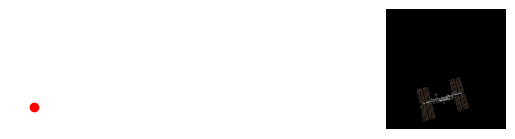

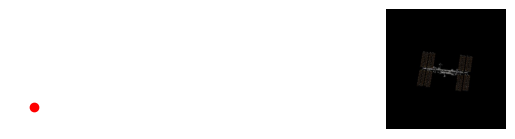

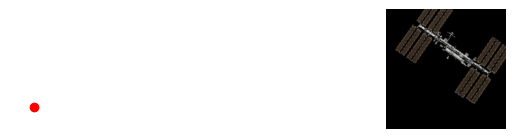

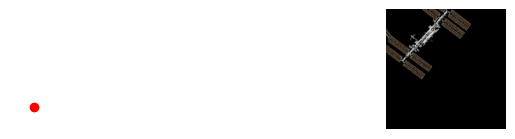

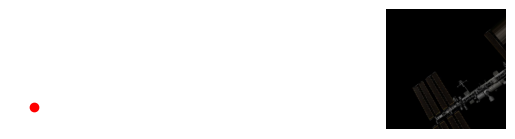

Batch 2:
Image ID: 9733.jpg, Rotation Angle: 16.3133124392753
Image ID: 63.jpg, Rotation Angle: 16.3133124392753
Image ID: 6400.jpg, Rotation Angle: 16.3133124392753
Image ID: 823.jpg, Rotation Angle: 16.3133124392753
Image ID: 4217.jpg, Rotation Angle: 16.3133124392753
Image ID: 3578.jpg, Rotation Angle: 16.3133124392753
Image ID: 2666.jpg, Rotation Angle: 16.3133124392753
Image ID: 5109.jpg, Rotation Angle: 16.3133124392753
Image ID: 2100.jpg, Rotation Angle: 16.3133124392753
Image ID: 4571.jpg, Rotation Angle: 16.3133124392753
Image ID: 7078.jpg, Rotation Angle: 16.3133124392753
Image ID: 1409.jpg, Rotation Angle: 16.3133124392753
Image ID: 9055.jpg, Rotation Angle: 16.3133124392753
Image ID: 6366.jpg, Rotation Angle: 16.3133124392753
Image ID: 189.jpg, Rotation Angle: 16.3133124392753
Image ID: 9041.jpg, Rotation Angle: 16.3133124392753
Image ID: 6372.jpg, Rotation Angle: 16.3133124392753
Image ID: 2114.jpg, Rotation Angle: 16.3133124392753
Image ID: 4565.jpg, Rotation Angle: 16.31

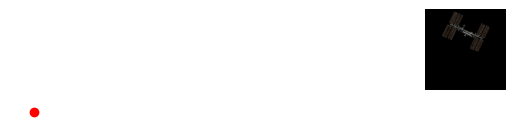

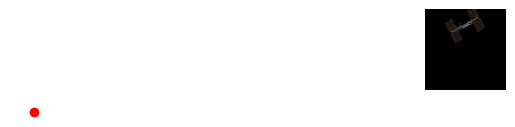

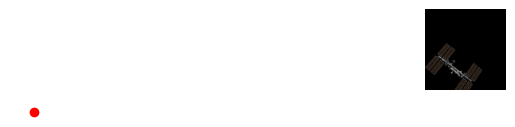

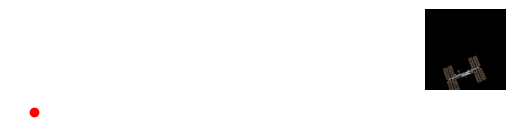

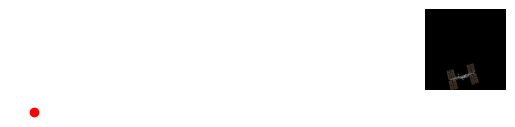

Batch 3:
Image ID: 9733.jpg, Rotation Angle: 6.381737124572545
Image ID: 63.jpg, Rotation Angle: 6.381737124572545
Image ID: 6400.jpg, Rotation Angle: 6.381737124572545
Image ID: 823.jpg, Rotation Angle: 6.381737124572545
Image ID: 4217.jpg, Rotation Angle: 6.381737124572545
Image ID: 3578.jpg, Rotation Angle: 6.381737124572545
Image ID: 2666.jpg, Rotation Angle: 6.381737124572545
Image ID: 5109.jpg, Rotation Angle: 6.381737124572545
Image ID: 2100.jpg, Rotation Angle: 6.381737124572545
Image ID: 4571.jpg, Rotation Angle: 6.381737124572545
Image ID: 7078.jpg, Rotation Angle: 6.381737124572545
Image ID: 1409.jpg, Rotation Angle: 6.381737124572545
Image ID: 9055.jpg, Rotation Angle: 6.381737124572545
Image ID: 6366.jpg, Rotation Angle: 6.381737124572545
Image ID: 189.jpg, Rotation Angle: 6.381737124572545
Image ID: 9041.jpg, Rotation Angle: 6.381737124572545
Image ID: 6372.jpg, Rotation Angle: 6.381737124572545
Image ID: 2114.jpg, Rotation Angle: 6.381737124572545
Image ID: 4565.jpg, Rot

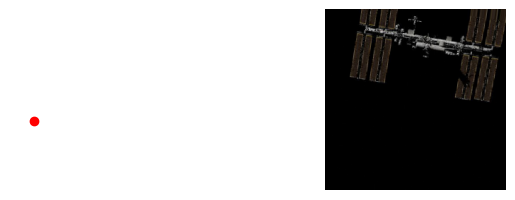

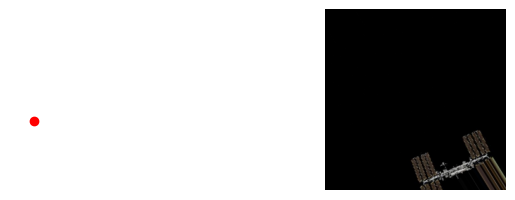

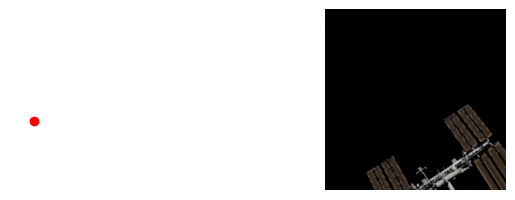

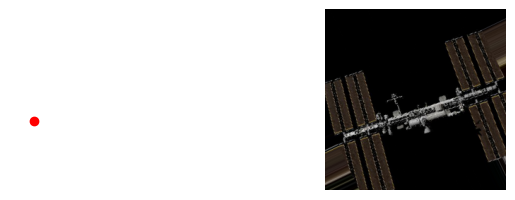

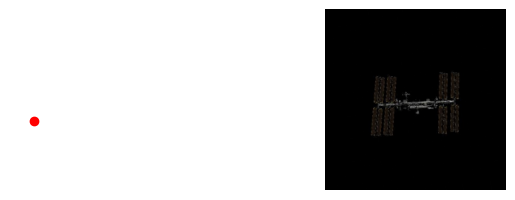

Batch 4:
Image ID: 9733.jpg, Rotation Angle: 21.40998897748382
Image ID: 63.jpg, Rotation Angle: 21.40998897748382
Image ID: 6400.jpg, Rotation Angle: 21.40998897748382
Image ID: 823.jpg, Rotation Angle: 21.40998897748382
Image ID: 4217.jpg, Rotation Angle: 21.40998897748382
Image ID: 3578.jpg, Rotation Angle: 21.40998897748382
Image ID: 2666.jpg, Rotation Angle: 21.40998897748382
Image ID: 5109.jpg, Rotation Angle: 21.40998897748382
Image ID: 2100.jpg, Rotation Angle: 21.40998897748382
Image ID: 4571.jpg, Rotation Angle: 21.40998897748382
Image ID: 7078.jpg, Rotation Angle: 21.40998897748382
Image ID: 1409.jpg, Rotation Angle: 21.40998897748382
Image ID: 9055.jpg, Rotation Angle: 21.40998897748382
Image ID: 6366.jpg, Rotation Angle: 21.40998897748382
Image ID: 189.jpg, Rotation Angle: 21.40998897748382
Image ID: 9041.jpg, Rotation Angle: 21.40998897748382
Image ID: 6372.jpg, Rotation Angle: 21.40998897748382
Image ID: 2114.jpg, Rotation Angle: 21.40998897748382
Image ID: 4565.jpg, Rot

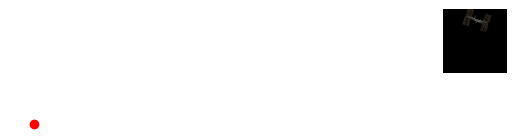

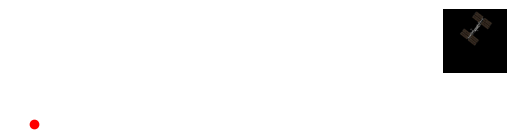

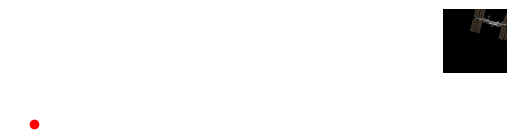

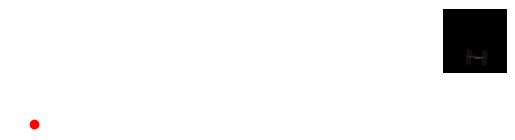

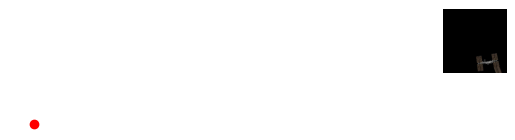

Batch 5:
Image ID: 9733.jpg, Rotation Angle: -27.94870347611671
Image ID: 63.jpg, Rotation Angle: -27.94870347611671
Image ID: 6400.jpg, Rotation Angle: -27.94870347611671
Image ID: 823.jpg, Rotation Angle: -27.94870347611671
Image ID: 4217.jpg, Rotation Angle: -27.94870347611671
Image ID: 3578.jpg, Rotation Angle: -27.94870347611671
Image ID: 2666.jpg, Rotation Angle: -27.94870347611671
Image ID: 5109.jpg, Rotation Angle: -27.94870347611671
Image ID: 2100.jpg, Rotation Angle: -27.94870347611671
Image ID: 4571.jpg, Rotation Angle: -27.94870347611671
Image ID: 7078.jpg, Rotation Angle: -27.94870347611671
Image ID: 1409.jpg, Rotation Angle: -27.94870347611671
Image ID: 9055.jpg, Rotation Angle: -27.94870347611671
Image ID: 6366.jpg, Rotation Angle: -27.94870347611671
Image ID: 189.jpg, Rotation Angle: -27.94870347611671
Image ID: 9041.jpg, Rotation Angle: -27.94870347611671
Image ID: 6372.jpg, Rotation Angle: -27.94870347611671
Image ID: 2114.jpg, Rotation Angle: -27.94870347611671
Image

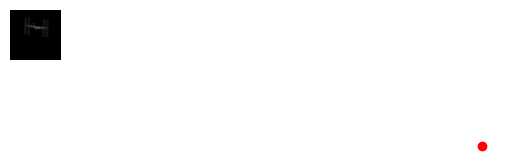

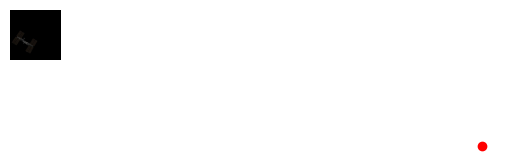

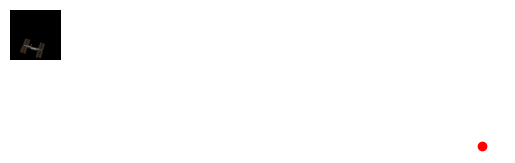

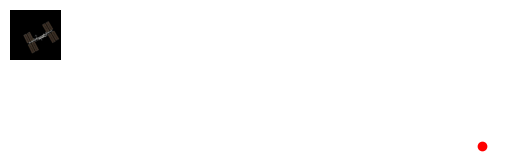

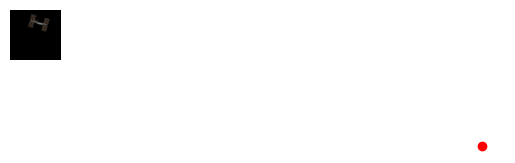

In [ ]:
import os
import numpy as np
import tensorflow as tf
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
from keras.src.legacy.preprocessing.image import ImageDataGenerator
import cv2  # For handling the pixel rotation matrix
import random

# Load images from a directory
def load_images_from_directory(directory_path, img_size=(512, 512)):
    image_paths = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith('.jpg') or f.endswith('.png')]
    images = []
    image_ids = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=img_size)
        img = img_to_array(img)
        images.append(img)
        image_ids.append(os.path.basename(img_path))  # Storing the image filename as the ID
    return np.array(images), image_ids # Return images as np.array and the corresponding ID (filename)

# Rotate pixel location using the rotation matrix
def rotate_pixel_location(pixel_x - 256, pixel_y - 256, image_shape, rotation_angle):
    """
    Rotate a pixel's location around the center of the image by the given rotation angle.
    
    Args:
    - pixel_x, pixel_y: The coordinates of the pixel to rotate.
    - image_shape: The shape of the image (height, width, channels).
    - rotation_angle: The angle (in degrees) by which to rotate the pixel.

    Returns:
    - (new_x, new_y): The new coordinates of the rotated pixel.
    """
    # Get image dimensions
    (h, w) = image_shape[:2]

    # Compute center of image
    center = (w // 2, h // 2)

    # Convert pixel coordinates to a 2x1 vector
    pixel_coords = np.array([pixel_x, pixel_y])

    # Create the rotation matrix
    M = cv2.getRotationMatrix2D(center, rotation_angle, 1.0)
    
    # Apply the rotation matrix to the pixel coordinates
    new_coords = np.dot(M[:, :2], pixel_coords) + M[:, 2]

    new_x, new_y = new_coords
    return int(new_x + 256), int(new_y + 256)

# Function to rotate images randomly using ImageDataGenerator
def rotate_images_randomly(images, rotation_range=180, batch_size=1):
    # Initialize ImageDataGenerator with random rotation
    datagen = ImageDataGenerator(rotation_range=rotation_range)
    
    # Apply transformations
    it = datagen.flow(images, batch_size=batch_size)
    
    return it

# Function to plot images with a pixel marked
def plot_images(images, pixel_coords=None):
    for img in images:
        plt.imshow(img.astype('uint8'))
        if pixel_coords:
            plt.scatter(pixel_coords[0], pixel_coords[1], color='red')  # Mark the pixel
        plt.axis('off')
        plt.show()

# Function to save images to a new directory
def save_images(images, image_ids, save_dir):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    for i, img in enumerate(images):
        img_path = os.path.join(save_dir, f"{image_ids[i]}_rotated.png")
        tf.keras.preprocessing.image.save_img(img_path, img)

# Main code
directory_path = '/Users/jacobbalek/.cache/kagglehub/datasets/msafi04/iss-docking-dataset/versions/1/train'  # Image Path
images, image_ids = load_images_from_directory(directory_path)

# Define the pixel coordinates to rotate (for demonstration, we choose a pixel in the center)
pixel_x, pixel_y = 128, 128  # Pixel to rotate, this can be any pixel in the image

# Apply random rotation
rotated_images_iterator = rotate_images_randomly(images, rotation_range=45, batch_size=500)

# Generate and plot rotated images (let's show the first batch of rotated images)
for i in range(5):  # Generate 5 batches of rotated images
    rotated_images = next(rotated_images_iterator)  # Get next batch

    # Random rotation angle (simulate a random angle similar to what ImageDataGenerator applies)
    rotation_angle = random.uniform(-45, 45)  # Random angle between -45 and 45 degrees

    # Rotate the pixel location
    new_pixel_x, new_pixel_y = rotate_pixel_location(pixel_x, pixel_y, images.shape, rotation_angle)

    # Print the image ID and rotation angle for each image in the batch
    print(f"Batch {i+1}:")
    for j, image_id in enumerate(image_ids):
        print(f"Image ID: {image_id}, Rotation Angle: {rotation_angle}")

    # Save rotated images with their image IDs
    save_images(rotated_images, image_ids, "Rotated_ISS_imgs")  # Save the rotated images to the directory
    print(f"Batch {i+1} saved.")

    # Plot the first few images
    plot_images(rotated_images[:5], pixel_coords=(new_pixel_x, new_pixel_y))  # Plot first 5 images in the batch
